Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variabes. Visualization can be a core component of this process beccause, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one will use most is relplot(0. This is a figure-level function for visualizingn statistical relationships using two common approaches: scatter pltos and line plots.
relplot () combinnes a FacetGrid with one of two axes-level functions:

scatterpot() (with kind="scatter"; the default)
lineplot() (with kind="line")

As we will see, these funnctions can be quite illuminnatinng because they use simple and easiy-understood representatins of data can nevertheless represent complex daataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Relating variables with scatter plots
The scatter pot is a mainstay  of statistical visualization. It depics the join distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a sustantial amount of information about wheter there in any meaningful relationship between them.

There are several way to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() fuinction. IN the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize catergorical data. The scatterplot() is the default kind in replot() (it can also be forced by setting kind="scatter'):


In [1]:

tips = sns.load_dataset("tips")


NameError: name 'sns' is not defined

While the points are plotted in two dimensions, in another dimension can be added to the pot by coloring the points accordinng to a third variable. In seaborn, this is referred to as using a "hue semantic", 
because the color of the point gains meaning:
    


In [ ]:
print(tips)

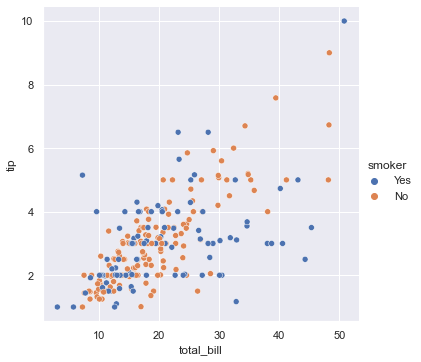

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

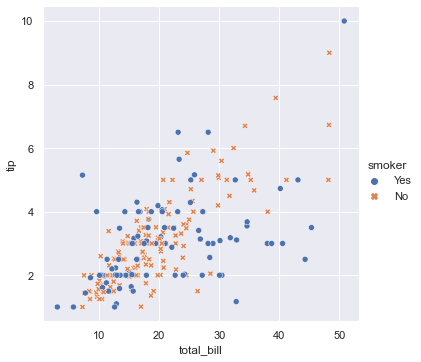

In [12]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
           data=tips);

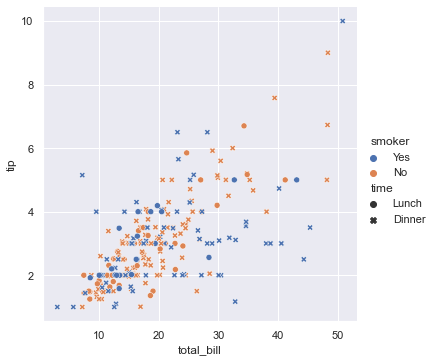

In [16]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

In the examples above, the hue semantic was categorical, so the defaul qualitative palette was applied. If the hue semantic is numeric(specifically, if it can be cast to float), the default coloring switches to a sequential palette:

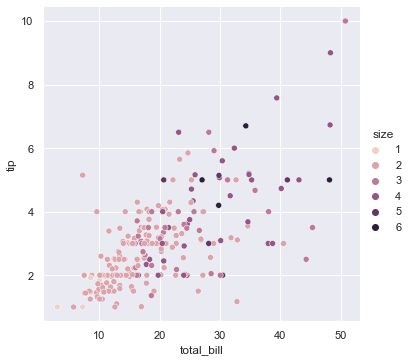

In [18]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

In both case, you can customize the color palette. There are many options for doing so. Here we customize a sequential pallete using the string interface to cubehelix_palette() :
    

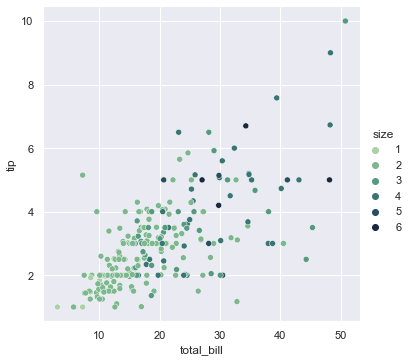

In [32]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

In [ ]:
The third kind of semantic variable changes the size of each point:

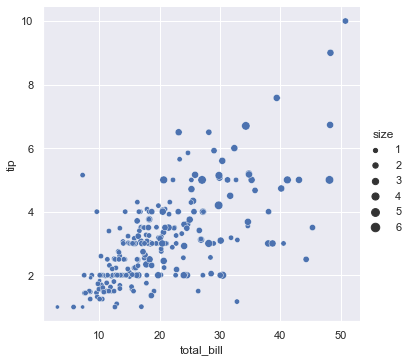

In [33]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);


unlike with matplotlib.pyplot.scatter(), the literal value of the vaariable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:


sns.relplot(x="total_bill", y="tip", size="size", sizes=(15,200), data=tips);

More examples for customizing how the different semantics are used to show statistcal relationships are shown in the scatterplot() API examples

Emphazising continuity with line plots
Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead,
the visual representation should be adapted for the specifics of the dataset and to the question
you are trying to answer with the pot.

With some daatasets, you may want to understand changes in one varaible as a function 
of time, or similaryly continuous variable. in this situation, a good choice to draw a
lilne pot. In seaborn, this can be accomplished by the lineplot() function, either 
directly or with relplot() by setting kind="line":

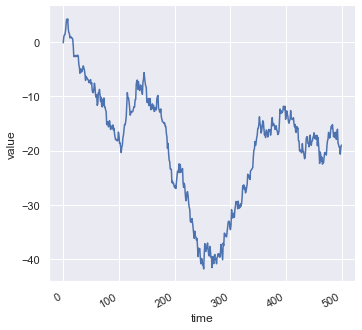

In [38]:
df = pd.DataFrame(dict(time=np.arange(500),
                      value=np.random.randn(500).cumsum()))
g= sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

Because lineplot(0 assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values  before plotting. However, this can be disabled:

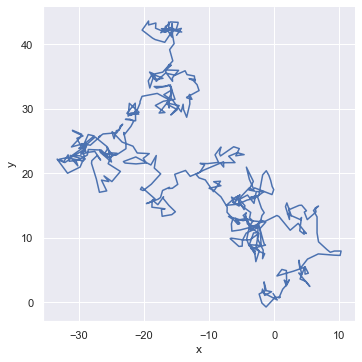

In [40]:
df= pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

Aggregation and representing uncertainty
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior 
in seaborn is to aggregrate the multple measurements at each x value y plotting
the mean and the 95% confidence interval around the mean:

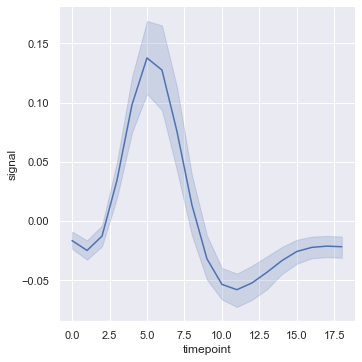

In [43]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larer datasets. It's therefore possiblel to disable them:


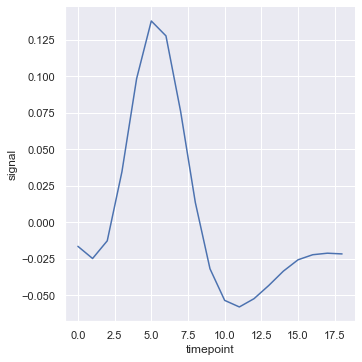

In [45]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

Another good option, especially with larger data, is to represent the spread of the distibution
at eacch timepoint by plotting the standard deviation instead of a confidence interva:

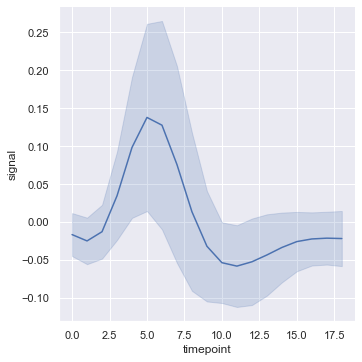

In [47]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

To turn off aggregation altogether, set the estimiator parameter to None. This might produce
a strange effect when the data have multiple observations at each point.

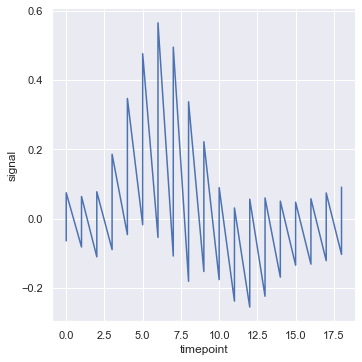

In [50]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

Plotting subsets of data with semantic mappings
The lineplot() function has the same flexibility as scatterplot(): It can show up to three additional vairables by modifying the hue, size, and style of the plot elements. It does so using the same API as scatterplot(), meaning that 
we don't need to stop and think about the parameters that control the look of lines vs. points in matplotlib

Using semantics in lineplot(0 will also determine how the data get aggregated. FOR example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to

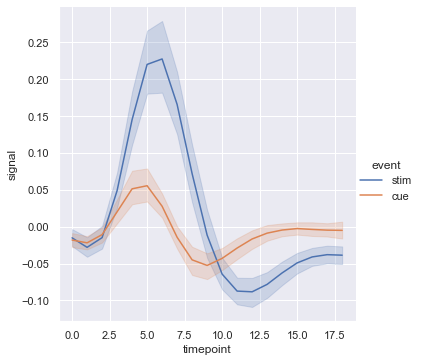

In [51]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);


Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

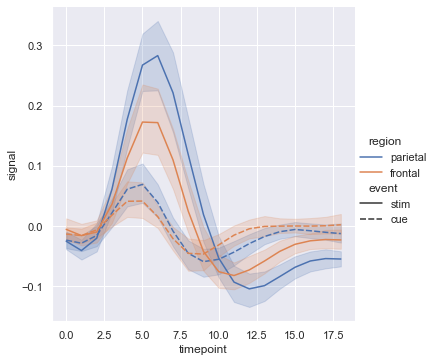

In [54]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
           kind="line", data=fmri);

But you can identify subsets by the markers used at each observation, either together with the 
dashes or instead of them:


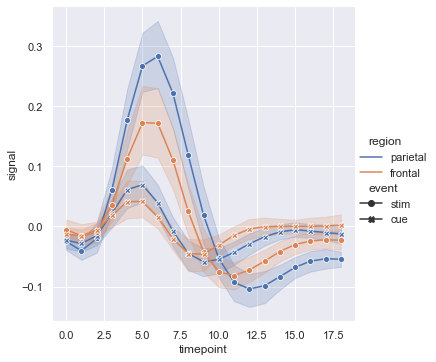

In [57]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
           dashes=False, markers=True, kind="line", data=fmri);

As with scatter plots, be cautious about making line plots using multiple semantics. While
sometimes color informative, they can also be difficult to parse and interpret. But even when you
are only examining changes across one additional variable, it can be useful to alter
both the color and style of the lines. This can make the plot more accessible
when printed to black-and-white or viewed by someone with color blindness:
    
    

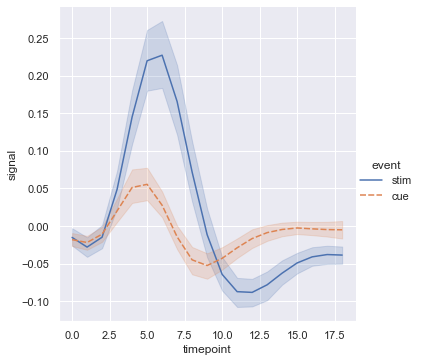

In [59]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
    kind="line", data=fmri);

When you are working with repeated measures data(that is, you have units that were sampled multiple times), you can also plot each sampling unity separately without distinguishining them through semantics. This avoids cluttering the legend:

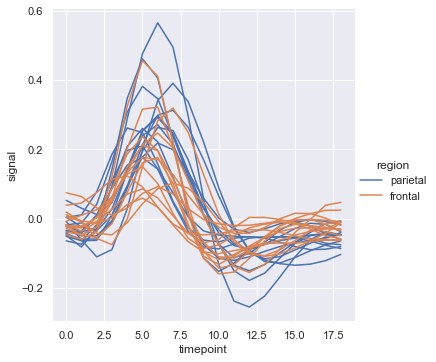

In [60]:
sns.relplot(x="timepoint", y="signal", hue="region",
           units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

The default colormap and handling of the legend in lineplot() also depends on whether the hue
semantic is categorical or numeric:


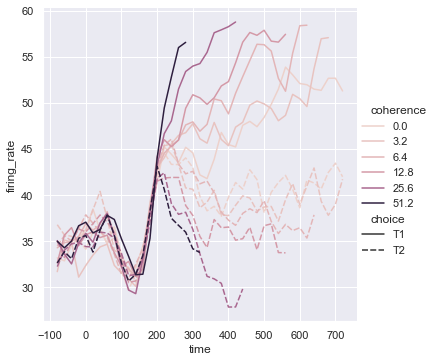

In [62]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
           hue="coherence", style="choice",
           kind="line", data=dots);

It may happen that, even though the hue variable is numeric, it is poorly represented by a linear
color scale. That's the case here, where the levels of the hue variable are logarithimically scaled.
You can provide specific color values for each line by passing a list or dictionary:

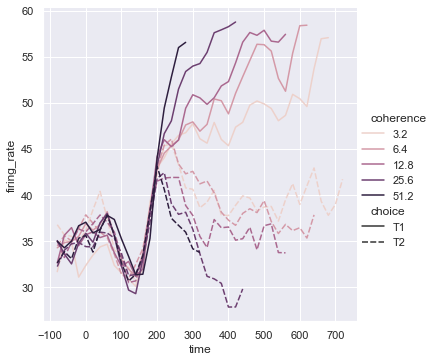

In [71]:
#Or you can alter how the colormap is normalized:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
           hue="coherence", style="choice",
           hue_norm=LogNorm(),
           kind="line",
           data=dots.query("coherence > 0"));



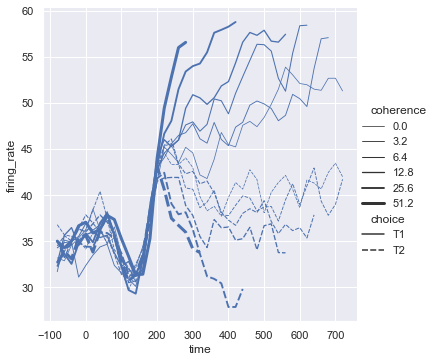

In [72]:
sns.relplot(x="time", y="firing_rate",
           size="coherence", style="choice",
           kind="line", data=dots);

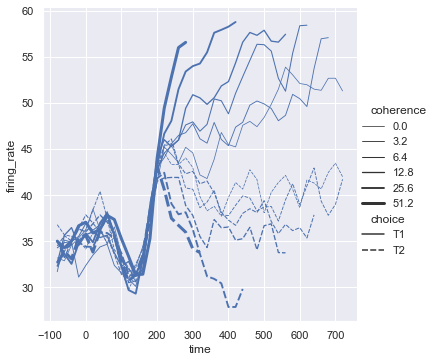

In [73]:
#the third semantic, size, changes the width of the lines:
sns.relplot(x="time", y="firing_rate",
           size="coherence", style="choice",
           kind="line", data=dots);

While the size variable will typically be numeric, it's also possible to map a categorical
variable with the width of the lines. Be cautious when doing so, because it will be difficult
to distinguish much more than "thick" vs "think" lines. However, dashes can be hard to perceive
when lines high-frequency variability, so using different widths may bne more effective
in that case:

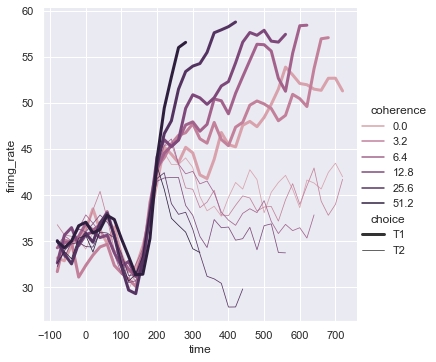

In [74]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

Plotting with date data
Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can tae advantage of matplotlib's ability to format dates in tick labels. but all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documenntation to see how it works:


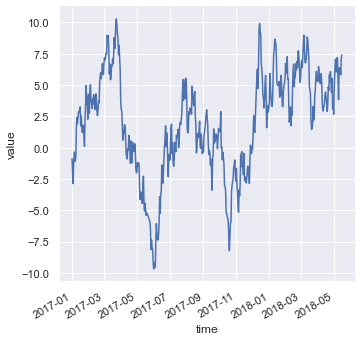

In [75]:
df= pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                     value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

Showing multiple relationships with facets
We've emphasized in this tutorial that, while these functions can show several semantic variables at once, it's not always effective to do so. But what about
when you do want to understand how a relationship between two variables depends on more than other variable?

The best approach may be to take more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it toone of the semantic roles in the plot use it to "face" the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

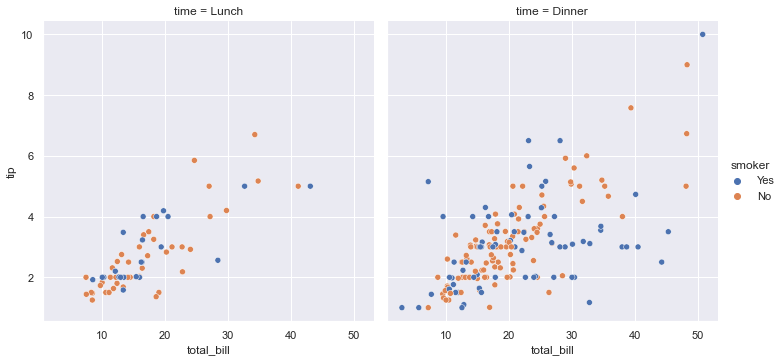

In [76]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
           col="time", data=tips);

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

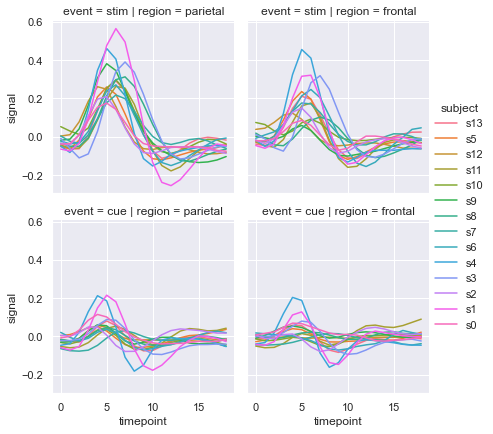

In [77]:
sns.relplot(x="timepoint", y="signal", hue="subject", 
           col="region", row="event", height=3,
           kind="line", estimator=None, data=fmri);

When you want to examine effects across many levels of a variable, it can be a good idea to facet 
that variable on the columns an dthen "wrap" the facets into the rows:

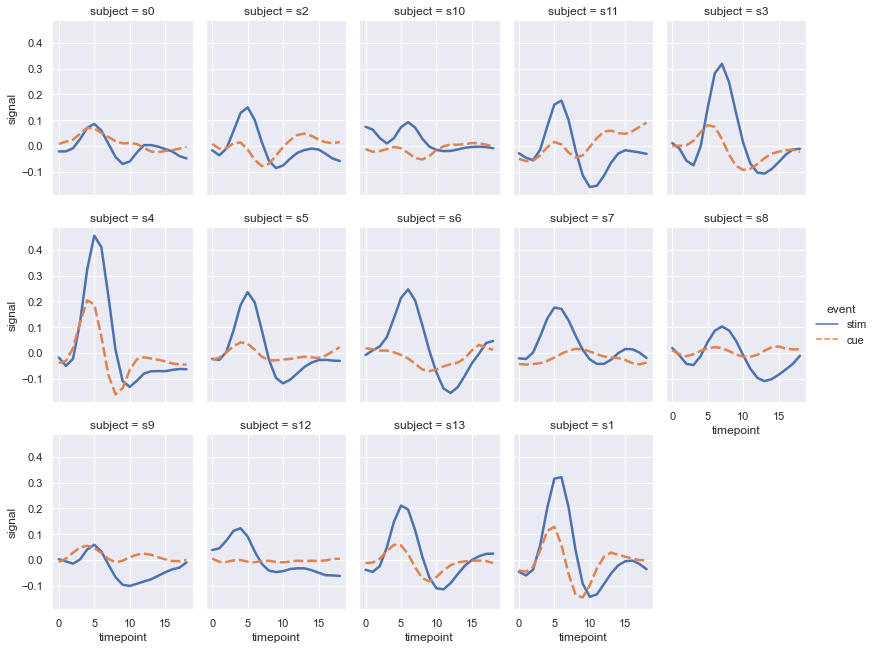

In [79]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
col="subject", col_wrap=5,
height=3, aspect=.75, linewidth=2.5,
kind="line", data=fmri.query("region == 'frontal'"));

These visualization, which are often called "lattice" plots or "small-multiples", are very
effective because they present the data in a format that makes it easy for the eye to detech both
overall patterns and deviations from those patterns. While you should make use of the
flexibility afforded by scatterplot() and relplot(), always try to keep in mind that
several simple plots are usually more effective than one complex plot.